In [1]:
import theano
import pymc3 as pm
import numpy as np
import theano.tensor as tt
from matplotlib import pyplot as plt

print('Running on PyMC3 v{}'.format(pm.__version__))

from datetime import datetime
import pickle # python3
import os
now = datetime.now

t_start = now()
print('hello')
print(t_start)

import multiprocessing
ncores = multiprocessing.cpu_count()
print('numcores: {}'.format(ncores))
#%%

Running on PyMC3 v3.8
hello
2020-02-27 12:32:31.016227
numcores: 8


In [2]:
print(os.getcwd())
if 'aglinsai' in os.getcwd():
    in_dir='/gsfs0/data/aglinsai/roi_paper_data'
    print('Im on cluster')
elif 'aidasaglinskas' in os.getcwd():
    in_dir='/Users/aidasaglinskas/Desktop/roi_paper_data/'
    print('Im on local')
else:
    raise(Exception('I dont know where I am'))

print(in_dir)

/Users/aidasaglinskas/Desktop/BC-BNP/NoteBooks
Im on local
/Users/aidasaglinskas/Desktop/roi_paper_data/


In [3]:
i = 0

temp = os.listdir(in_dir)
cmat_files = [file for file in temp if 'cmat' in file]
proportion_files = [file for file in temp if 'proportion' in file]
subs_files = [file for file in temp if 'subs' in file]
cmat_files.sort()
proportion_files.sort()
subs_files.sort()

[print(file) for file in cmat_files]
print('______')
[print(file) for file in proportion_files]
print('______')
[print(file) for file in subs_files]


cmat_fn = os.path.join(in_dir,cmat_files[i])
proportionMat_fn = os.path.join(in_dir,proportion_files[i])
subs_fn = os.path.join(in_dir,subs_files[i])
cmats = np.load(cmat_fn)
proportionMat = np.load(proportionMat_fn)
subs = np.load(subs_fn)

subs=subs['arr_0']
proportionMat = proportionMat['arr_0']
cmats = cmats['arr_0']

nsubs=cmats.shape[0]
nmasks=cmats.shape[1]
conn=np.zeros((nsubs,nmasks,1275))

for s in range(nsubs):
    for m in range(nmasks):
        conn[s,m,:]=cmats[s,m,:,:][np.triu_indices(51,1)]

print(cmat_fn)
print(cmats.shape)
print(proportionMat_fn)
print(proportionMat.shape)
print(subs_fn)
print(subs.shape)
print('conn shape')
print(conn.shape)

#proportionMat[s,m,:] = perc
#cmat[s,m,:,:]

pmask2_3001_cmats_121_task-rest.npz
pmask_3001_cmats_127_task-face.npz
pmask_3001_cmats_127_task-rest.npz
rMask_3001_cmats_105_task-rest.npz
rfx2Mask_501_cmats_16_task-face.npz
rfx2Mask_501_cmats_16_task-rest.npz
rfx2Mask_501_cmats_20_task-face.npz
______
pmask2_3001_proportionMat_121_task-rest.npz
pmask_3001_proportionMat_127_task-face.npz
pmask_3001_proportionMat_127_task-rest.npz
rMask_3001_proportionMat_105_task-rest.npz
rfx2Mask_501_proportionMat_16_task-face.npz
rfx2Mask_501_proportionMat_16_task-rest.npz
rfx2Mask_501_proportionMat_20_task-face.npz
______
pmask2_3001_subs_121_task-rest.npz
pmask_3001_subs_127_task-face.npz
pmask_3001_subs_127_task-rest.npz
rMask_3001_subs_105_task-rest.npz
rfx2Mask_501_subs_16_task-face.npz
rfx2Mask_501_subs_16_task-rest.npz
rfx2Mask_501_subs_20_task-face.npz
/Users/aidasaglinskas/Desktop/roi_paper_data/pmask2_3001_cmats_121_task-rest.npz
(121, 51, 51, 51)
/Users/aidasaglinskas/Desktop/roi_paper_data/pmask2_3001_proportionMat_121_task-rest.npz
(1

In [4]:
from sklearn import mixture


In [8]:
model = mixture.BayesianGaussianMixture(max_iter=100000,
                                      n_components=121,covariance_type='tied',
                                      init_params='random',tol=0.001,
                                      weight_concentration_prior_type='dirichlet_process',weight_concentration_prior=1,mean_precision_prior=None)

z = model.fit_predict(conn[:,0,:])

[ 84  56 113 113  29  26  45  35 105  28  17  44  44 104  62   1  56  89
  29 120  54  47  85  56 117  68  10  26   0  63  31  88  35  56  39  45
 113  49  26  14   1  64 116 110  92  88  72  45  88  54   8  94 105  49
  26   3 115  99   0  45   4  60 120 114  10  35  35  35  27  14  31  56
  54  20  89  35  63  20   7  89   2   3  73   2  56  91   0  96  89  67
  23  35   8  57  74  25  37 103  19  67 104  92   4  26  35 113  83  33
 106  28  43  95  29  87  34   0  34  11  98  91  31]


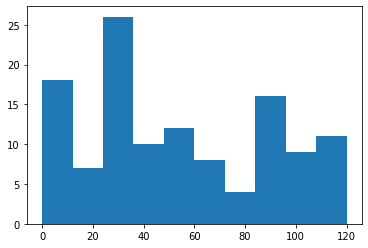

In [11]:
print(z)
plt.hist(z);

2020-02-24 18:30:50.725193
2020-02-24 18:41:29.927089


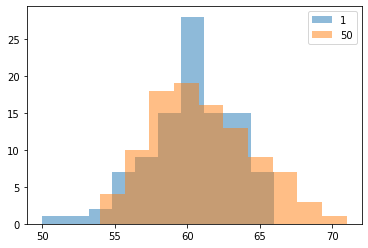

In [70]:
model = mixture.BayesianGaussianMixture(max_iter=100000,
                                      n_components=121,covariance_type='tied',
                                      init_params='random',tol=0.001,
                                      weight_concentration_prior_type='dirichlet_process',weight_concentration_prior=1,mean_precision_prior=None)

print(now())
vec1=[len(np.unique(np.unique(model.fit_predict(conn[:,0,:])))) for _ in range(100)]
vec2=[len(np.unique(np.unique(model.fit_predict(conn[:,50,:])))) for _ in range(100)]

plt.hist(vec1,alpha=.5)
plt.hist(vec2,alpha=.5)
plt.legend(['1','50'])
print(now())

In [68]:
print(np.mean(vec1))
print(np.mean(vec2))

60.4
60.91


2020-02-24 15:49:18.571188
2020-02-24 15:49:59.201572


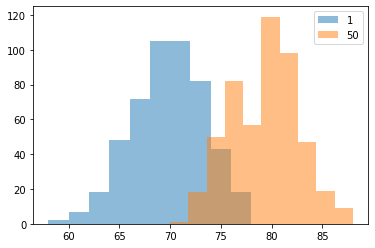

In [63]:
model = mixture.BayesianGaussianMixture(max_iter=100000,
                                      n_components=121,covariance_type='tied',
                                      init_params='random',tol=0.001,
                                      weight_concentration_prior_type='dirichlet_process',weight_concentration_prior=None,mean_precision_prior=None)

print(now())
vec1=[len(np.unique(np.unique(model.fit_predict(proportionMat[:,0,:])))) for _ in range(500)]
vec2=[len(np.unique(np.unique(model.fit_predict(proportionMat[:,50,:])))) for _ in range(500)]

plt.hist(vec1,alpha=.5)
plt.hist(vec2,alpha=.5)
plt.legend(['1','50'])
print(now())

print(np.mean(vec1))
print(np.mean(vec2))